# Pymaceuticals Inc.
---

### Analysis

The data set is balanced between 51% male and 49% female mice.
Capomulin with mean = 40.675741	and Median = 41.557809	and 
Ramicane  with mean = 40.216745 and Median = 40.673236 were the best treatment regimens.
Capomulin had the largest number of mice of the treatment regimens.
There is a high correlation between mouse weight and tumor volume of .84.
Infubinol data set has a high percentage of potential outliers: 31.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from pathlib import Path

# Study data files
mouse_metadata_path = Path("../data/Mouse_metadata.csv")
study_results_path = Path("../data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head(31)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mice_count = mouse_data_complete["Mouse ID"].nunique()
mice_count

249

In [4]:
mouse_bad_data = mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] == "g989")]
mouse_bad_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup_mice_ID = mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint']) 
dup_mice_ID = mouse_data_complete[mouse_data_complete["Mouse ID"].duplicated() &
                                  mouse_data_complete["Timepoint"].duplicated()]
dup_mice_ID

#array(['g989'], dtype=object)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_bad_data = mouse_data_complete.loc[(mouse_data_complete["Mouse ID"] == "g989")]
mouse_bad_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete.drop(mouse_data_complete[mouse_data_complete['Mouse ID'] == 'g989'].index)

mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count = mouse_data_clean["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame
mouse_data_mean = mouse_data_clean.groupby(["Drug Regimen"]).mean(numeric_only=True)
mouse_data_median = mouse_data_clean.groupby(["Drug Regimen"]).median(numeric_only=True)
mouse_data_var = mouse_data_clean.groupby(["Drug Regimen"]).var(numeric_only=True)
mouse_data_std = mouse_data_clean.groupby(["Drug Regimen"]).std(numeric_only=True)
mouse_data_sem = mouse_data_clean.groupby(["Drug Regimen"]).sem(numeric_only=True)

tumor_vol_summary = pd.DataFrame(
    {"Mean Tumor Volume": mouse_data_mean["Tumor Volume (mm3)"],
     "Median Tumor Volume": mouse_data_median["Tumor Volume (mm3)"],
     "Tumor Volume Variance": mouse_data_var["Tumor Volume (mm3)"],
     "Tumor Volume Std. Dev.": mouse_data_std["Tumor Volume (mm3)"],
     "Tumor Volume Std. Err.": mouse_data_sem["Tumor Volume (mm3)"]
    }
)
tumor_vol_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_numeric = mouse_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_numeric
#stats_numeric = mouse_data_clean.groupby(["Drug Regimen"]).describe()
#stats_numeric.head(10)
                   

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
#Another easier way
stats_numeric = mouse_data_clean.groupby(["Drug Regimen"]).describe()
stats_numeric

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [14]:
y_axis = mouse_data_clean.groupby(["Drug Regimen"]).count()
y_axis = y_axis['Mouse ID']
y_axis.head(10)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

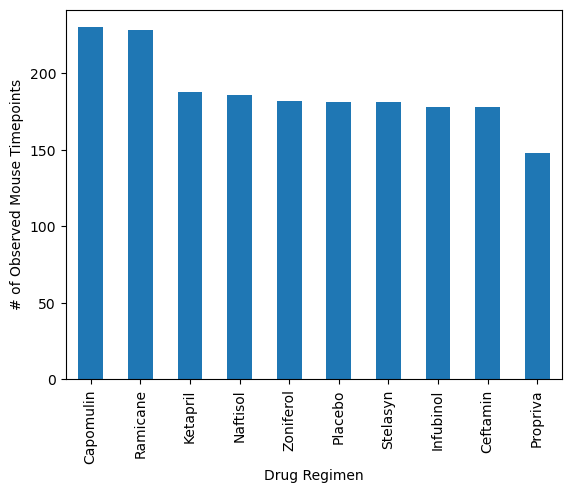

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen

mouse_counts = mouse_data_clean['Drug Regimen'].value_counts()
mouse_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

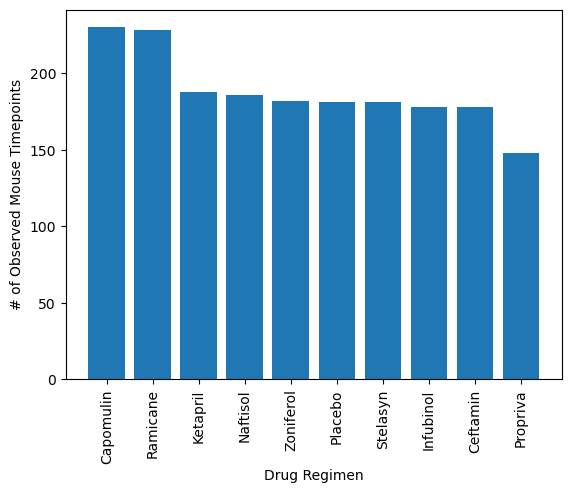

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

mouse_counts = mouse_data_clean['Drug Regimen'].value_counts()

plt.bar(mouse_counts.index.values, mouse_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

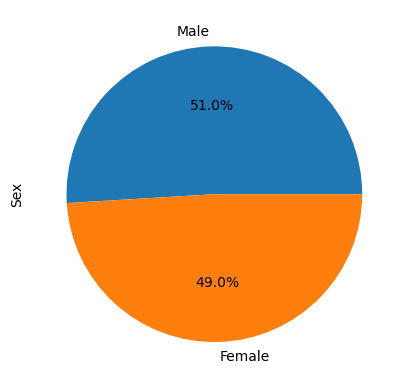

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_sex = mouse_data_clean.Sex.value_counts()

#mouse_data_clean.groupby(["Sex"]).sum().plot(kind = "pie",y='Drug Regimen')
mouse_data_sex.plot(kind='pie', y='Female',autopct='%1.1f%%')

plt.show()


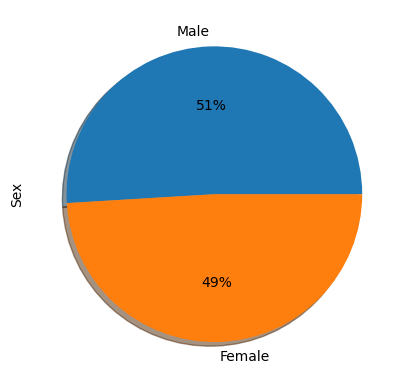

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_data_sex = mouse_data_clean.Sex.value_counts()
plt.ylabel("Sex")
plt.pie(mouse_data_sex, labels=mouse_data_sex.index.values, autopct="%1.0f%%", 
        shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = mouse_data_clean.groupby(["Mouse ID"])["Timepoint"].max()
tumor_vol = tumor_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merge = tumor_vol.merge(mouse_data_clean,on=['Mouse ID','Timepoint'],how="left")
tumor_vol

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
print(Drugs)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in Drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_mm3 = mouse_merge.loc[mouse_merge["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(vol_mm3)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_mm3.quantile([.25,.5,.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    IQR = upper_quart-lower_quart
    lower_bound = lower_quart - (1.5*IQR)
    upper_bound = upper_quart + (1.5*IQR)
    outliers = vol_mm3.loc[(vol_mm3 < lower_bound) | (vol_mm3 > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


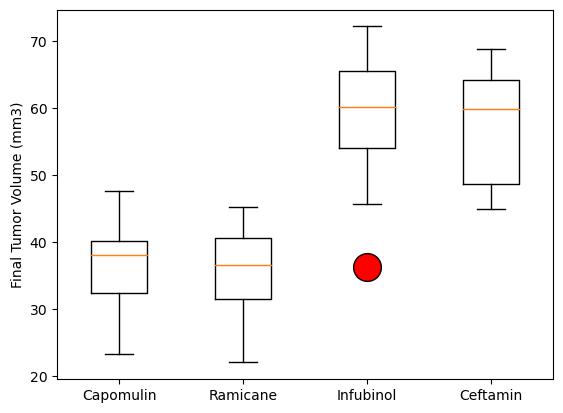

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#
color = dict(markerfacecolor='red',markersize=20)
plt.boxplot(tumor_vol, labels = Drugs,flierprops=color)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

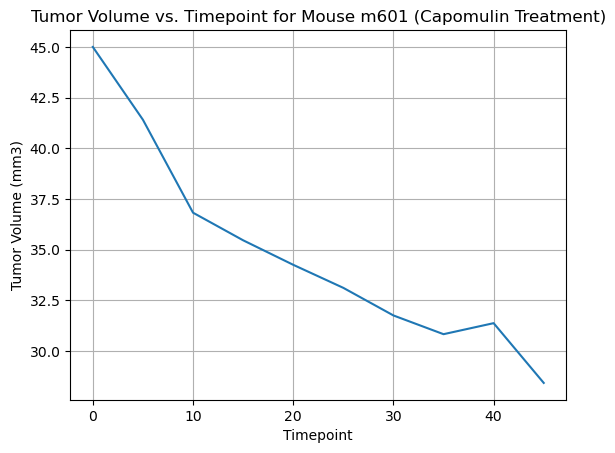

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_data = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == "Capomulin"]
mouse_m601 = Capomulin_data.loc[Capomulin_data["Mouse ID"] == 'm601']
#mouse_m601                                

plt.plot(mouse_m601["Timepoint"],mouse_m601["Tumor Volume (mm3)"])
plt.xlabel ("Timepoint")
plt.ylabel ("Tumor Volume (mm3)")
plt.title (f"Tumor Volume vs. Timepoint for Mouse m601 (Capomulin Treatment)")
plt.grid(True)
plt.show ()
                      

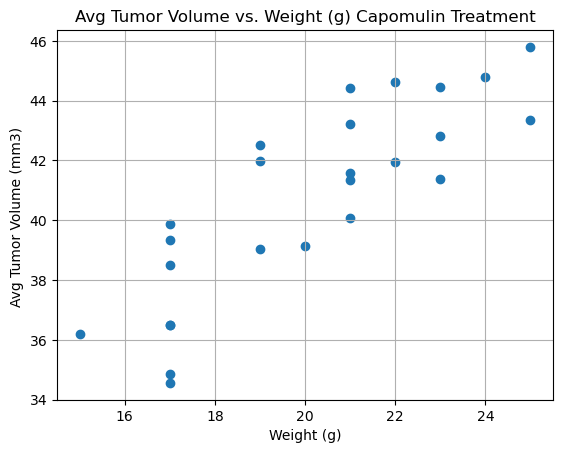

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_tumor = mouse_data_clean.loc[mouse_data_clean['Drug Regimen'] == "Capomulin"]
capomulin_vol_mm3 = capomulin_tumor.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_vol_mm3['Weight (g)'],capomulin_vol_mm3['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel ("Avg Tumor Volume (mm3) ")
plt.title (f"Avg Tumor Volume vs. Weight (g) Capomulin Treatment")
plt.grid(True)
plt.show ()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


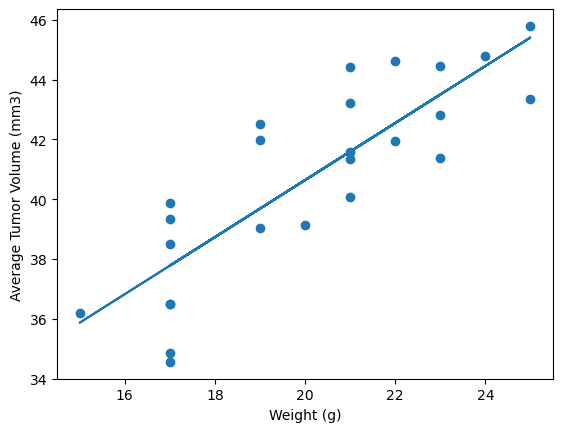

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff=round(st.pearsonr(capomulin_vol_mm3['Weight (g)'],capomulin_vol_mm3['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coeff}")
model = st.linregress(capomulin_vol_mm3['Weight (g)'],capomulin_vol_mm3['Tumor Volume (mm3)'])

y_values = capomulin_vol_mm3['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_vol_mm3['Weight (g)'],capomulin_vol_mm3['Tumor Volume (mm3)'])
plt.plot(capomulin_vol_mm3['Weight (g)'],y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()